In [2]:
# %load ../graph.py
#!/usr/bin/env python

# In[1]:


import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np

matplotlib.rc('font', family='AppleGothic')  # mac 은 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # - 기호 사용 가능

In [3]:
import seaborn as sns

# titanic 데이터 가져오기
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


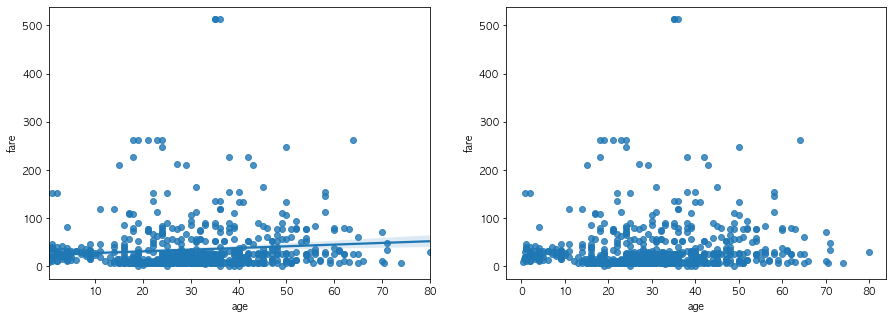

In [6]:
# 하나의 페이지에 두개의 그래프 그림, 한행에 2개의 그래프
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형 회귀선이 있는 그래프
sns.regplot(x = 'age' , # x 축
            y = 'fare' , # y 축
            data = titanic, # 데이터
            ax = ax1) # 그래프 그리고자 하는 객체

sns.regplot(x = 'age' , 
            y = 'fare' , 
            data = titanic, 
            ax = ax2 , 
            fit_reg = False)

plt.show()

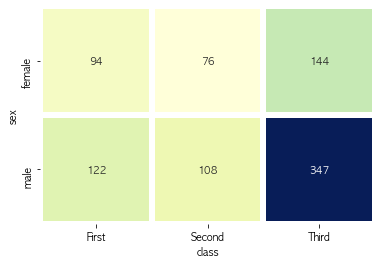

In [9]:
# 히트맵
table = titanic.pivot_table(index = ['sex'] , columns = ['class'], aggfunc = 'size')

table

# 히트맵 그리기
sns.heatmap(table, # 데이터
           annot = True, fmt = 'd', # 데이터 값 표시 여부, 정수형
           cmap = 'YlGnBu', # 컬러 맵의 종류
           linewidth = 5,
           cbar = False
           ) 

plt.show()

/Users/kimhyunjo/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


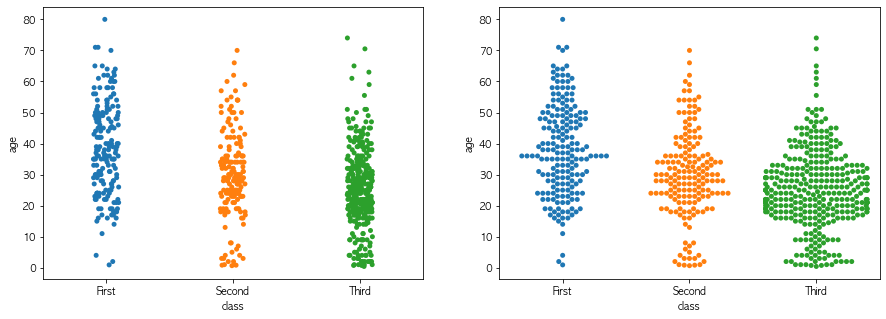

In [10]:
# 범주형 데이터의 산점도
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포도
sns.stripplot(x = 'class' , # x 축
            y = 'age' , # y 축
            data = titanic, # 데이터
            ax = ax1) # 그래프 그리고자 하는 객체

sns.swarmplot(x = 'class' , 
            y = 'age' , 
            data = titanic, 
            ax = ax2 )

plt.show()

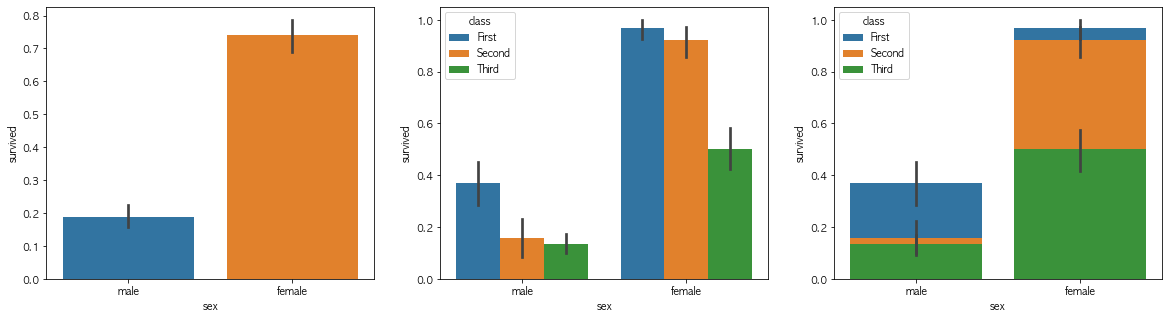

In [11]:
# 막대 그래프
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', data=titanic, hue='class', ax=ax2)
sns.barplot(x='sex', y='survived', data=titanic, hue='class', dodge=False, ax=ax3)
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

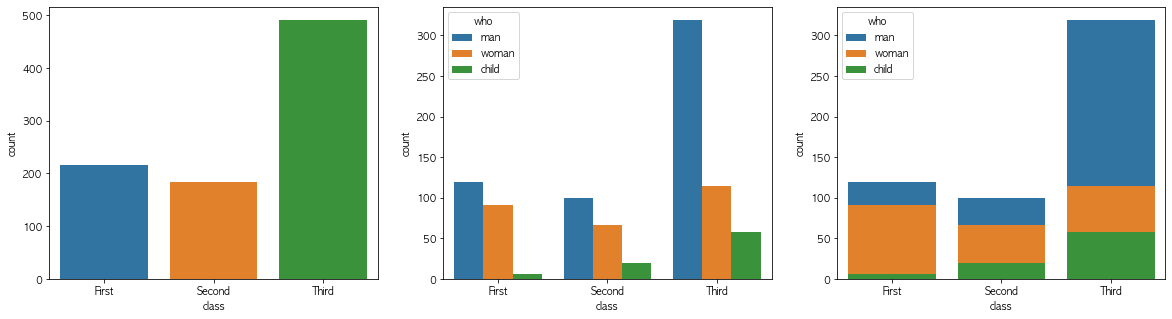

In [12]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x = 'class', data = titanic, ax = ax1)

# hue 옵션에 'who' 추가
sns.countplot(x = 'class', hue = 'who', data = titanic, ax = ax2)

# hue 옵션에 'who' 추가 , 누적 그래프로
sns.countplot(x = 'class', hue = 'who', data = titanic, dodge = False, ax = ax3)

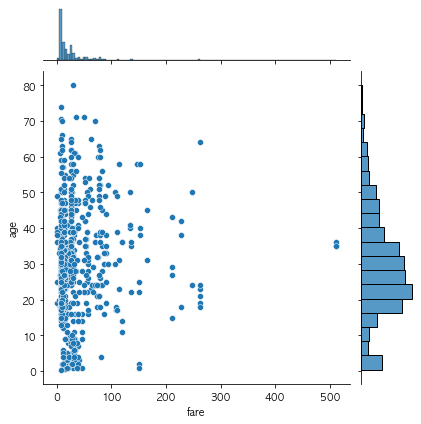

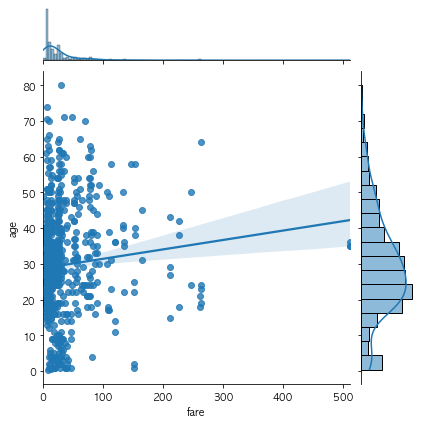

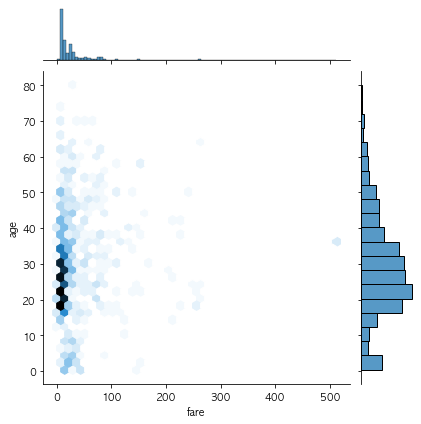

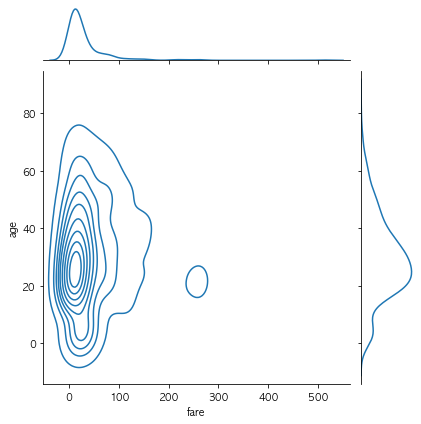

In [13]:
# jointplot 

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

plt.show()